# The basic morphological operators are erosion, dilation, opening and closing. Opening can help to remove background noise.

### https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [15]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [16]:
img = load_img()

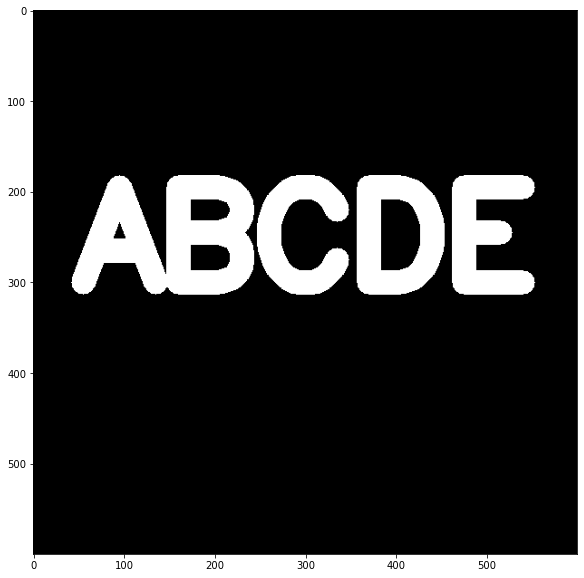

In [17]:
display_img(img)

## Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

In [18]:
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations = 1)

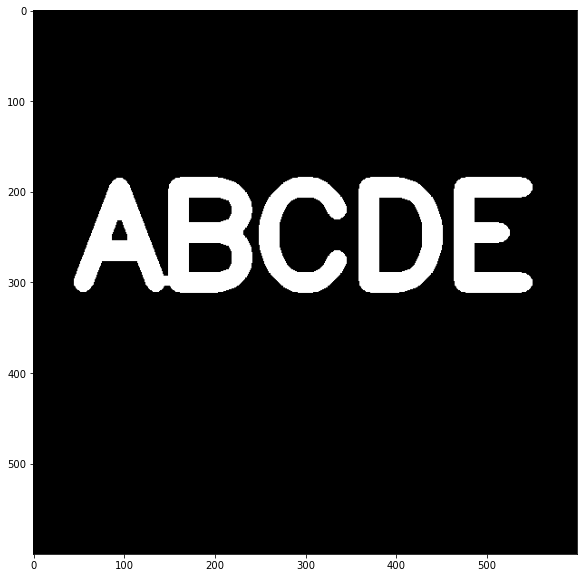

In [19]:
display_img(erosion1)

In [20]:
img = load_img()
kernel = np.ones((5,5),np.uint8)
erosion5 = cv2.erode(img,kernel,iterations = 4)

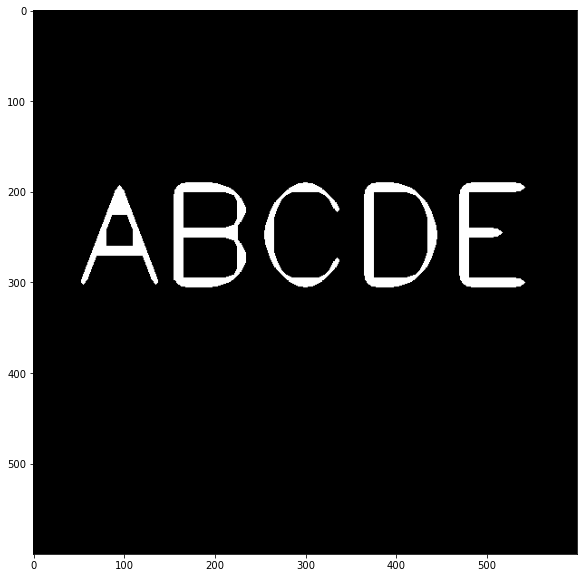

In [21]:
display_img(erosion5)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

In [22]:
img = load_img()

In [23]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [24]:
white_noise

array([[0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [25]:
white_noise = white_noise*255

In [26]:
white_noise.shape

(600, 600)

In [27]:
img.shape

(600, 600)

In [28]:
noise_img = white_noise+img

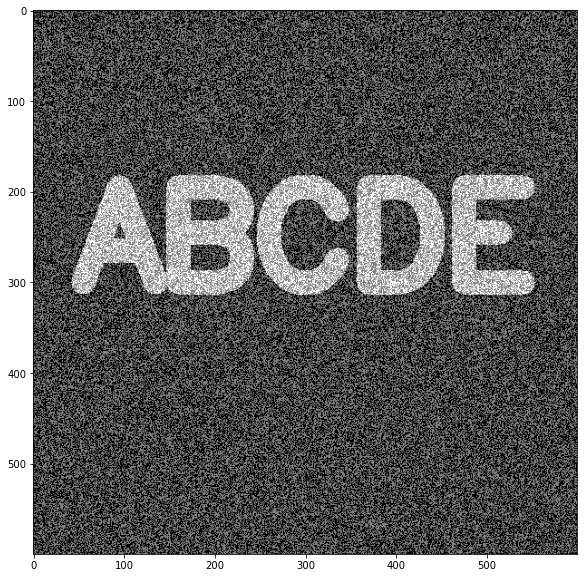

In [29]:
display_img(noise_img)

In [30]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

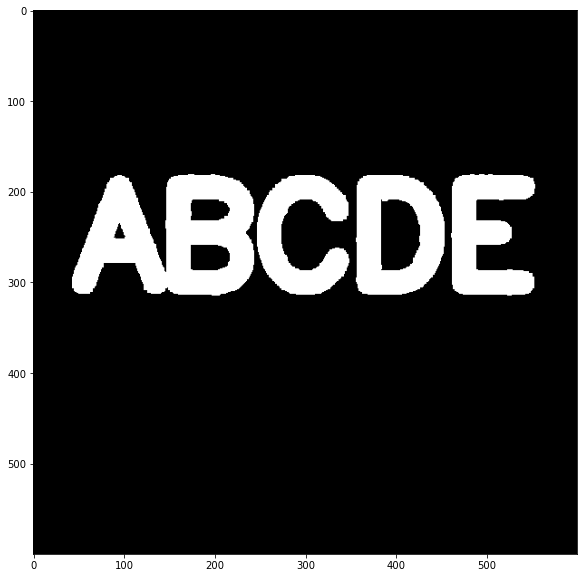

In [31]:
display_img(opening)

### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [32]:
img = load_img()

In [33]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [34]:
black_noise

array([[1, 1, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0]])

In [35]:
black_noise= black_noise * -255

In [36]:
black_noise_img = img + black_noise

In [37]:
black_noise_img

array([[-255., -255., -255., ...,    0.,    0., -255.],
       [   0., -255., -255., ..., -255.,    0., -255.],
       [   0., -255., -255., ...,    0.,    0.,    0.],
       ...,
       [-255.,    0.,    0., ...,    0., -255.,    0.],
       [-255., -255., -255., ...,    0.,    0.,    0.],
       [-255., -255.,    0., ...,    0., -255.,    0.]])

In [38]:
black_noise_img[black_noise_img==-255] = 0

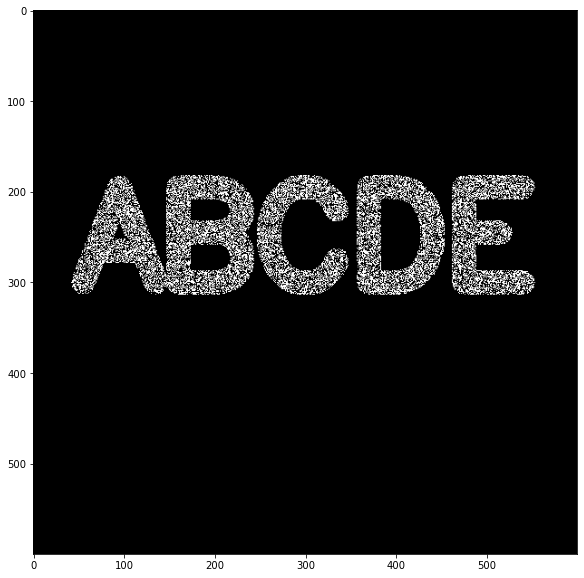

In [39]:
display_img(black_noise_img)

In [40]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

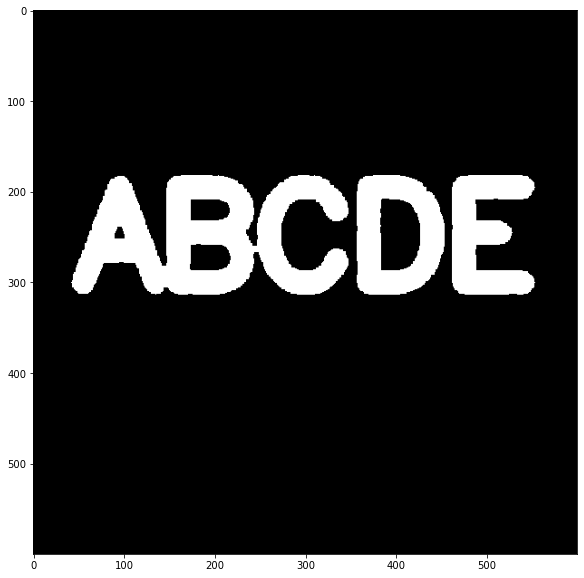

In [41]:
display_img(closing)

## Morphological Gradient

Difference between dilation and erosion of an image.

In [42]:
img = load_img()

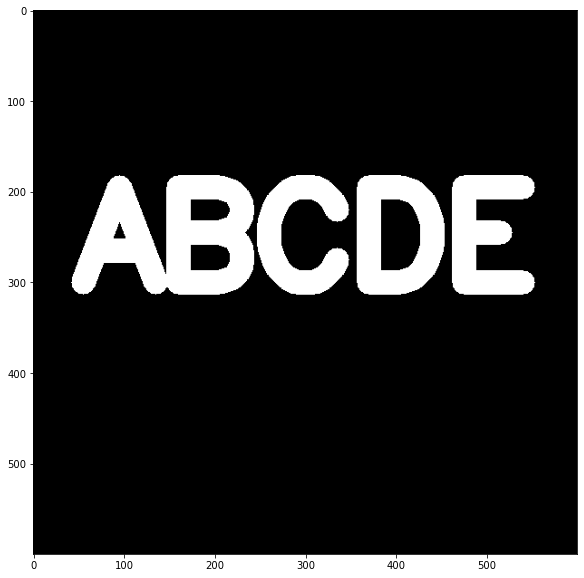

In [43]:
display_img(img)

In [44]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

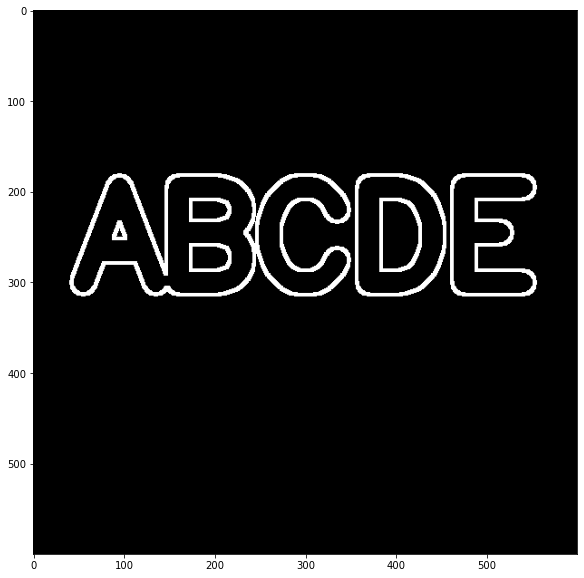

In [45]:
display_img(gradient)